# CASHFREE PAYMENTS - ASSIGNMENT
##  Ashwath J

In [178]:
import pandas as pd
import numpy as np
import seaborn as sns

# Q) Please write a script to identify if any `remitterBank` is facing a downtime which is leading to higher payment failure for that bank?

In [18]:
txn_df = pd.read_table("C:\\Users\\Intel\\Downloads\\q2_assignment.txt",delimiter=" ")

In [19]:
txn_df

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank
0,1,4,91888034,2022-05-09,00:00:20,SUCCESS,81,ICICI
1,2,9,91897144,2022-05-09,00:00:14,INCOMPLETE,3815,HDFC
2,3,9,91892679,2022-05-09,00:00:58,SUCCESS,3634,HDFC
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC
4,5,2,91924210,2022-05-09,00:01:41,SUCCESS,2763,HDFC
...,...,...,...,...,...,...,...,...
99995,99996,7,968345940,2022-05-10,03:48:12,SUCCESS,3669,SBI
99996,99997,7,657564029,2022-05-10,03:47:11,SUCCESS,3807,HDFC
99997,99998,1,571671404,2022-05-10,03:46:55,SUCCESS,929,HDFC
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI


In [113]:
plot1 = txn_df[txn_df["txtdate"]=="2022-05-09"].groupby(txn_df["txstatus"])["amount"].sum()
plot_df = pd.DataFrame(plot1).reset_index()
plot_df

,txstatus,amount
0,FAILED,66413956
1,INCOMPLETE,17435498
2,SUCCESS,89224651


In [114]:
plot2 = txn_df[txn_df["txtdate"]=="2022-05-10"].groupby(txn_df["txstatus"])["amount"].sum()
plot_df2 = pd.DataFrame(plot2).reset_index()

In [119]:
fnl = pd.merge(plot_df,plot_df2,on="txstatus")
fnl.columns = ["txstatus","9May","10May"]
fnl

,txstatus,9May,10May
0,FAILED,66413956,13654043
1,INCOMPLETE,17435498,2725256
2,SUCCESS,89224651,11087210


<AxesSubplot:xlabel='txstatus', ylabel='9May'>

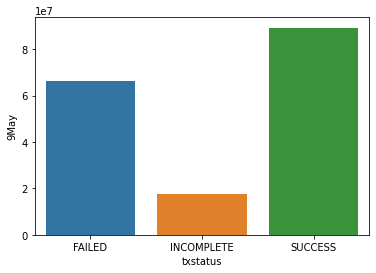

In [122]:
sns.barplot(x="txstatus",y="9May",data = fnl)

<AxesSubplot:xlabel='txstatus', ylabel='10May'>

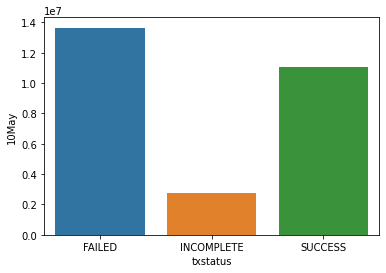

In [123]:
sns.barplot(x="txstatus",y="10May",data = fnl)

# Sucess rate can be calculated by counting number of sucess attempts by total number of attempts.

In [28]:
txn_df[txn_df["remitterbank"] == "ICICI"].head(30)
txn_df["txstatus"].value_counts()

SUCCESS       50253
FAILED        39691
INCOMPLETE    10056
Name: txstatus, dtype: int64

In [31]:
txn_df["txtdate"].value_counts()

2022-05-09    86342
2022-05-10    13658
Name: txtdate, dtype: int64

# SUCCESS RATE

In [33]:
def map(str):
    if(str=="SUCCESS"):
        return 1
    elif(str=="FAILED"):
        return 0
    else:
        return 0 

In [66]:
txn_df["Category"] = txn_df.apply(lambda x:map(x['txstatus']),axis = 1)
txn_df

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category
0,1,4,91888034,2022-05-09,00:00:20,SUCCESS,81,ICICI,1
1,2,9,91897144,2022-05-09,00:00:14,INCOMPLETE,3815,HDFC,0
2,3,9,91892679,2022-05-09,00:00:58,SUCCESS,3634,HDFC,1
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC,0
4,5,2,91924210,2022-05-09,00:01:41,SUCCESS,2763,HDFC,1
...,...,...,...,...,...,...,...,...,...
99995,99996,7,968345940,2022-05-10,03:48:12,SUCCESS,3669,SBI,1
99996,99997,7,657564029,2022-05-10,03:47:11,SUCCESS,3807,HDFC,1
99997,99998,1,571671404,2022-05-10,03:46:55,SUCCESS,929,HDFC,1
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI,0


In [67]:
txn_df_nine = txn_df[txn_df["txtdate"] == "2022-05-09"]

In [68]:
txn_sum = txn_df_nine.groupby(txn_df["remitterbank"]).sum()
txn_count = txn_df_nine.groupby(txn_df["remitterbank"]).count()

In [69]:
df2 = txn_sum[["Category"]]
df2.reset_index()

,remitterbank,Category
0,HDFC,17898
1,ICICI,17904
2,SBI,8905


In [70]:
df = txn_count[["Category"]].reset_index()
df

,remitterbank,Category
0,HDFC,34627
1,ICICI,34528
2,SBI,17187


In [71]:
success_df = pd.merge(df,df2,on = 'remitterbank')

In [72]:
success_df.columns = ["remitterbank","transaction_count","Success_count"]

In [73]:
success_df["SucessRate"] = (success_df["Success_count"]/success_df["transaction_count"])*100
success_df

,remitterbank,transaction_count,Success_count,SucessRate
0,HDFC,34627,17898,51.687989
1,ICICI,34528,17904,51.853568
2,SBI,17187,8905,51.812416


In [74]:
txn_df_ten = txn_df[txn_df["txtdate"] == "2022-05-10"]
txn_df_ten

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category
86304,86305,1,211931255,2022-05-10,00:00:04,FAILED,261,HDFC,0
86315,86316,1,327178416,2022-05-10,00:00:07,FAILED,2106,HDFC,0
86323,86324,1,817779516,2022-05-10,00:00:17,FAILED,904,ICICI,0
86324,86325,6,379170600,2022-05-10,00:00:22,FAILED,2173,SBI,0
86331,86332,6,401726548,2022-05-10,00:00:20,FAILED,64,SBI,0
...,...,...,...,...,...,...,...,...,...
99995,99996,7,968345940,2022-05-10,03:48:12,SUCCESS,3669,SBI,1
99996,99997,7,657564029,2022-05-10,03:47:11,SUCCESS,3807,HDFC,1
99997,99998,1,571671404,2022-05-10,03:46:55,SUCCESS,929,HDFC,1
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI,0


In [76]:
txn_sum_ten = txn_df_ten.groupby(txn_df["remitterbank"]).sum()
txn_count_ten = txn_df_ten.groupby(txn_df["remitterbank"]).count()

In [77]:
df2_ten = txn_sum_ten[["Category"]]
df2_ten.reset_index()

,remitterbank,Category
0,HDFC,2227
1,ICICI,2193
2,SBI,1126


In [78]:
df_ten = txn_count_ten[["Category"]].reset_index()
df_ten

,remitterbank,Category
0,HDFC,5447
1,ICICI,5431
2,SBI,2780


In [79]:
success_df_ten = pd.merge(df_ten,df2_ten,on = 'remitterbank')


In [80]:
success_df_ten.columns = ["remitterbank","transaction_count","Success_count"]

In [81]:
success_df_ten

,remitterbank,transaction_count,Success_count
0,HDFC,5447,2227
1,ICICI,5431,2193
2,SBI,2780,1126


In [86]:
success_df_ten["SucessRate"] = (success_df_ten["Success_count"]/success_df_ten["transaction_count"])*100
success_df_ten

,remitterbank,transaction_count,Success_count,SucessRate
0,HDFC,5447,2227,40.884891
1,ICICI,5431,2193,40.379304
2,SBI,2780,1126,40.503597


SUCESS RATING

In [87]:
success_df_ten

,remitterbank,transaction_count,Success_count,SucessRate
0,HDFC,5447,2227,40.884891
1,ICICI,5431,2193,40.379304
2,SBI,2780,1126,40.503597


In [88]:
success_df

,remitterbank,transaction_count,Success_count,SucessRate
0,HDFC,34627,17898,51.687989
1,ICICI,34528,17904,51.853568
2,SBI,17187,8905,51.812416


Reason for the decline in success rate on 10May is because the data is not present for the complete day

# Q) How do you build a baseline success rate

The biggest problem with sucess rate as a metric, is we include the reattempts of failed transactions.
 ex. Lets say in total a bank has 85 successes, 15 failures and 10 incomplete, so our Sucess rate turns out to be 85/(85+15+10) = 0.77,
but in reality merchants reattempt the failed attempts, thus increasing our number of failures again.
ex. out of 15 failed they attempt these 15 again and lets say 10 has turned to be successes and 5 failed again.
Now the Success rate would be = (85+10)/(85+15+10+15) = 0.76

In [128]:
def substr(str):
    return str[:2]

In [130]:
txn_df.head()

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category
0,1,4,91888034,2022-05-09,00:00:20,SUCCESS,81,ICICI,1
1,2,9,91897144,2022-05-09,00:00:14,INCOMPLETE,3815,HDFC,0
2,3,9,91892679,2022-05-09,00:00:58,SUCCESS,3634,HDFC,1
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC,0
4,5,2,91924210,2022-05-09,00:01:41,SUCCESS,2763,HDFC,1


In [131]:
txn_df["hours"] = txn_df["txtime"].apply(substr)
txn_df

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category,hours
0,1,4,91888034,2022-05-09,00:00:20,SUCCESS,81,ICICI,1,00
1,2,9,91897144,2022-05-09,00:00:14,INCOMPLETE,3815,HDFC,0,00
2,3,9,91892679,2022-05-09,00:00:58,SUCCESS,3634,HDFC,1,00
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC,0,00
4,5,2,91924210,2022-05-09,00:01:41,SUCCESS,2763,HDFC,1,00
...,...,...,...,...,...,...,...,...,...,...
99995,99996,7,968345940,2022-05-10,03:48:12,SUCCESS,3669,SBI,1,03
99996,99997,7,657564029,2022-05-10,03:47:11,SUCCESS,3807,HDFC,1,03
99997,99998,1,571671404,2022-05-10,03:46:55,SUCCESS,929,HDFC,1,03
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI,0,03


In [146]:
txn_df_9 = txn_df[txn_df["txtdate"]=="2022-05-09"]
temp9 = pd.DataFrame(txn_df_9.groupby(txn_df_9["hours"])["Category"].sum()).reset_index()
temp9_2 = pd.DataFrame(txn_df_9.groupby(txn_df_9["hours"])["Category"].count()).reset_index()
fnl9 = pd.merge(temp9,temp9_2,on="hours")
fnl9.columns = ["hours","Success","total"]
fnl9["Success_rate"]  = fnl9["Success"]/fnl9["total"]
fnl9["Success_rate"]

0     0.599549
1     0.604386
2     0.610617
3     0.588938
4     0.604115
5     0.600888
6     0.598115
7     0.608466
8     0.593672
9     0.618465
10    0.606280
11    0.602941
12    0.608116
13    0.582940
14    0.415136
15    0.399834
16    0.393475
17    0.393897
18    0.400278
19    0.399002
20    0.409192
21    0.390122
22    0.403499
23    0.396441
Name: Success_rate, dtype: float64

In [148]:
txn_df_10 = txn_df[txn_df["txtdate"]=="2022-05-10"]
temp10 = pd.DataFrame(txn_df_10.groupby(txn_df_10["hours"])["Category"].sum()).reset_index()
temp10_2 = pd.DataFrame(txn_df_10.groupby(txn_df_10["hours"])["Category"].count()).reset_index()
fnl10 = pd.merge(temp10,temp10_2,on="hours")
fnl10.columns = ["hours","Success","total"]
fnl10["Success_rate"]  = fnl10["Success"] / fnl10["total"]
fnl10["Success_rate"]

0    0.412778
1    0.400556
2    0.403996
3    0.407148
Name: Success_rate, dtype: float64

# BaseLine success rate is determined by finding the hourly success rate.

# The maximum success rate achieved in a day can be set as Baseline success rate.

#  How do you build a model to identify which remitter bank is facing a downtime ?

Time motion study is done on the FAILED statuses of individual bank and the downtime of individual remitter bank is calculated. 

In [149]:
txn_df

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category,hours
0,1,4,91888034,2022-05-09,00:00:20,SUCCESS,81,ICICI,1,00
1,2,9,91897144,2022-05-09,00:00:14,INCOMPLETE,3815,HDFC,0,00
2,3,9,91892679,2022-05-09,00:00:58,SUCCESS,3634,HDFC,1,00
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC,0,00
4,5,2,91924210,2022-05-09,00:01:41,SUCCESS,2763,HDFC,1,00
...,...,...,...,...,...,...,...,...,...,...
99995,99996,7,968345940,2022-05-10,03:48:12,SUCCESS,3669,SBI,1,03
99996,99997,7,657564029,2022-05-10,03:47:11,SUCCESS,3807,HDFC,1,03
99997,99998,1,571671404,2022-05-10,03:46:55,SUCCESS,929,HDFC,1,03
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI,0,03


In [156]:
down_time_9 = txn_df[(txn_df["txstatus"] == "FAILED") & (txn_df["txtdate"]=="2022-05-09")]
down_time_9

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category,hours
3,4,7,91918300,2022-05-09,00:00:22,FAILED,3060,HDFC,0,00
5,6,7,91886778,2022-05-09,00:00:33,FAILED,3417,HDFC,0,00
7,8,5,91957520,2022-05-09,00:00:52,FAILED,1596,ICICI,0,00
12,13,4,91987301,2022-05-09,00:00:25,FAILED,2532,ICICI,0,00
16,17,2,91990599,2022-05-09,00:01:29,FAILED,3144,HDFC,0,00
...,...,...,...,...,...,...,...,...,...,...
86344,86345,9,318536625,2022-05-09,23:59:31,FAILED,3544,HDFC,0,23
86345,86346,4,673334964,2022-05-09,23:59:54,FAILED,3889,SBI,0,23
86349,86350,2,211044000,2022-05-09,23:59:46,FAILED,715,HDFC,0,23
86351,86352,7,554641368,2022-05-09,23:59:37,FAILED,3619,HDFC,0,23


In [167]:
dt_9 = down_time_9.groupby(down_time_9["remitterbank"])["txstatus"].count().reset_index()
dt_9

,remitterbank,txstatus
0,HDFC,13265
1,ICICI,13097
2,SBI,6559


<AxesSubplot:xlabel='remitterbank', ylabel='txstatus'>

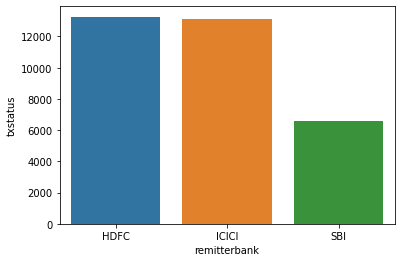

In [168]:
sns.barplot(x="remitterbank",y="txstatus",data=dt_9)

In [161]:
down_time_10 = txn_df[(txn_df["txstatus"] == "FAILED") & (txn_df["txtdate"]=="2022-05-10")]
down_time_10

,upi_id,merchantid,txnid,txtdate,txtime,txstatus,amount,remitterbank,Category,hours
86304,86305,1,211931255,2022-05-10,00:00:04,FAILED,261,HDFC,0,00
86315,86316,1,327178416,2022-05-10,00:00:07,FAILED,2106,HDFC,0,00
86323,86324,1,817779516,2022-05-10,00:00:17,FAILED,904,ICICI,0,00
86324,86325,6,379170600,2022-05-10,00:00:22,FAILED,2173,SBI,0,00
86331,86332,6,401726548,2022-05-10,00:00:20,FAILED,64,SBI,0,00
...,...,...,...,...,...,...,...,...,...,...
99990,99991,4,925305985,2022-05-10,03:47:01,FAILED,3963,ICICI,0,03
99993,99994,4,179575738,2022-05-10,03:46:58,FAILED,1353,SBI,0,03
99994,99995,4,783546415,2022-05-10,03:46:49,FAILED,3550,HDFC,0,03
99998,99999,1,917972739,2022-05-10,03:47:46,FAILED,627,SBI,0,03


In [169]:
dt_10 = down_time_10.groupby(down_time_10["remitterbank"])["txstatus"].count().reset_index()
dt_10

,remitterbank,txstatus
0,HDFC,2699
1,ICICI,2681
2,SBI,1390


In [175]:
down_time_10[down_time_10["remitterbank"] == "HDFC"]["txtime"].nunique()

2440

In [176]:
down_time_10[down_time_10["remitterbank"] == "ICICI"]["txtime"].nunique()

2423

In [177]:
down_time_10[down_time_10["remitterbank"] == "SBI"]["txtime"].nunique()

1319

<AxesSubplot:xlabel='remitterbank', ylabel='txstatus'>

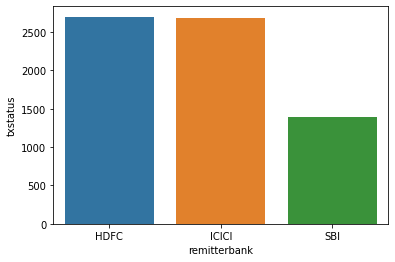

In [170]:
sns.barplot(x="remitterbank",y="txstatus",data=dt_10)

HDFC Bank has the highest downtime compared to ICICI nad followed by SBI, which has the least.

The reason is clear the overall transaction counts are high in HDFC compared to the other two remitter banks.

# Q1) Please write a script to visualize and present the new, churn, expansion and contraction GMV for these merchants.

In [179]:
churn_df = pd.read_csv("C:\\Users\\Intel\\Downloads\\assignment_churn_2022.csv")
churn_df

,month,AccountID,count,sum
0,12,278005,441,17845058
1,12,2739,6090,1796542
2,12,225356,2499,1230348
3,12,228502,1190,38854
4,12,27972,332,309681
...,...,...,...,...
99022,1,169632,1,1
99023,1,172439,1,1
99024,2,178773,1,7
99025,9,277024,1,1


The given raw data is modified using SQL and categorical columns are added

CREATE TABLE churn_2022 as
SELECT *,
CASE WHEN previous_month_sum > sums THEN "Contraction"
WHEN previous_month_sum = 0 THEN "New"
WHEN  previous_month_sum < sums and previous_month_sum > 0 THEN "Expansion"
ELSE " "
END AS category
FROM(
select month,AccountID,counts,sums,row_number() over(partition by AccountID order by month desc)  as ranks
,lead(sums,1,0) over(PARTITION by AccountID ORDER by month desc)
as previous_month_sum
from assignment_churn_2022
) tab1
order by month desc

In [180]:
churn_2022 = pd.read_csv("C:\\Users\\Intel\\Downloads\\churn_2022.csv")
churn_2022

,month,AccountID,counts,sums,ranks,previous_month_sum,category
0,12,32,1,3,1,1,Expansion
1,12,73,1,1052,1,2706,Contraction
2,12,85,1,5333,1,3749,Expansion
3,12,108,1,339,1,106,Expansion
4,12,133,49,14893,1,8078,Expansion
...,...,...,...,...,...,...,...
99022,1,177712,1,1,2,0,New
99023,1,177844,1,1,6,0,New
99024,1,177905,1,1,1,0,New
99025,1,177993,1,1,12,0,New


Calculating the categorical GMVs for each month

In [181]:
new_df = churn_2022[churn_2022["category"] =="New"]
new_df

,month,AccountID,counts,sums,ranks,previous_month_sum,category
9,12,202,1,17074,1,0,New
82,12,2715,1,105,1,0,New
148,12,3842,1,130,1,0,New
160,12,4174,3,55797,1,0,New
272,12,11757,1,14,1,0,New
...,...,...,...,...,...,...,...
99022,1,177712,1,1,2,0,New
99023,1,177844,1,1,6,0,New
99024,1,177905,1,1,1,0,New
99025,1,177993,1,1,12,0,New


In [184]:
new_fnl = new_df.groupby("month")["sums"].sum().reset_index()
new_fnl

,month,sums
0,1,595472120
1,2,16562002
2,3,45628211
3,4,10479879
4,5,45341299
5,6,15031147
6,7,27272631
7,8,23010836
8,9,5096733
9,10,1110834


<AxesSubplot:xlabel='month', ylabel='sums'>

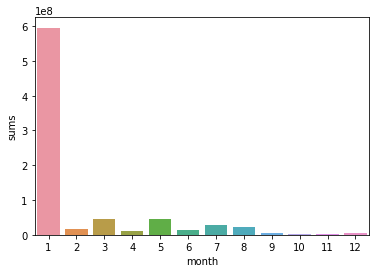

In [185]:
sns.barplot(x="month",y="sums",data=new_fnl)

Since the data starts from Jan 2022 all the Accounts before Jan are considered to be new.That's the reason data seems to be skewed. 

Month 5 has the highest new Account holders.

In [186]:
expansion_df = churn_2022[churn_2022["category"] =="Expansion"]
expansion_df

,month,AccountID,counts,sums,ranks,previous_month_sum,category
0,12,32,1,3,1,1,Expansion
2,12,85,1,5333,1,3749,Expansion
3,12,108,1,339,1,106,Expansion
4,12,133,49,14893,1,8078,Expansion
7,12,175,1,272,1,62,Expansion
...,...,...,...,...,...,...,...
91225,2,177439,1,10,3,5,Expansion
91234,2,177619,2,1924,1,366,Expansion
91243,2,177712,1,15,1,1,Expansion
91253,2,177844,1,48,5,1,Expansion


In [188]:
expansion_fnl = expansion_df.groupby("month")["sums"].sum().reset_index()
expansion_fnl

,month,sums
0,2,533128537
1,3,504993571
2,4,481292293
3,5,743899547
4,6,704142422
5,7,1274646656
6,8,973332641
7,9,635969111
8,10,1061199336
9,11,1145300466


<AxesSubplot:xlabel='month', ylabel='sums'>

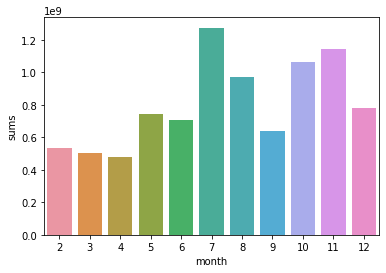

In [189]:
sns.barplot(x="month",y="sums",data=expansion_fnl)

Month 7 has the highest expansion GMV among the other months.

In [190]:
contraction_df = churn_2022[churn_2022["category"] =="Contraction"]
contraction_df

,month,AccountID,counts,sums,ranks,previous_month_sum,category
1,12,73,1,1052,1,2706,Contraction
5,12,150,322,1114686,1,1208090,Contraction
6,12,162,5714,17569560,1,18409908,Contraction
8,12,183,7,12873,1,16016,Contraction
11,12,219,2,2423,1,3662,Contraction
...,...,...,...,...,...,...,...
91130,2,176388,1,1,3,68349,Contraction
91161,2,176906,1,17,1,40,Contraction
91165,2,176923,1,1,1,61317,Contraction
91214,2,177361,1,8,2,174,Contraction


In [191]:
contraction_fnl = contraction_df.groupby("month")["sums"].sum().reset_index()
contraction_fnl

,month,sums
0,2,163648077
1,3,263245616
2,4,297564019
3,5,146197405
4,6,378046576
5,7,174306257
6,8,445796947
7,9,711119103
8,10,307716461
9,11,411689971


<AxesSubplot:xlabel='month', ylabel='sums'>

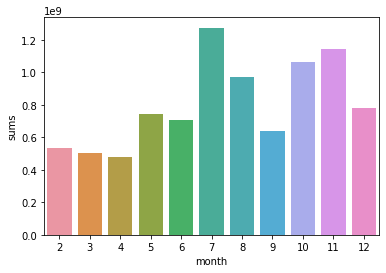

In [192]:
sns.barplot(x="month",y="sums",data=expansion_fnl)

Month 7 has the highest Contraction GMV among other months

In [199]:
churn_2022

,month,AccountID,counts,sums,ranks,previous_month_sum,category
0,12,32,1,3,1,1,Expansion
1,12,73,1,1052,1,2706,Contraction
2,12,85,1,5333,1,3749,Expansion
3,12,108,1,339,1,106,Expansion
4,12,133,49,14893,1,8078,Expansion
...,...,...,...,...,...,...,...
99022,1,177712,1,1,2,0,New
99023,1,177844,1,1,6,0,New
99024,1,177905,1,1,1,0,New
99025,1,177993,1,1,12,0,New


CHURN FOR MONTH 12 is calculated below

In [213]:
a = churn_2022[(churn_2022["month"]==12) & (churn_2022["category"] != "New")]["sums"].sum()
a

1419737540

In [214]:
b = churn_2022[(churn_2022["month"]==11)]["sums"].sum()
b

1558903514

In [216]:
churn_val_12 = b-a
churn_val_12

139165974

MONTHLY RETENTIONS

In [240]:
init = churn_2022[churn_2022["month"] == churn_2022["month"].min()]["AccountID"].count()

In [251]:
retention_df = churn_2022[(churn_2022["month"]  != 1) & (churn_2022["category"] !="New")].groupby("month")["AccountID"].count().reset_index()
retention_df

,month,AccountID
0,2,5025
1,3,5758
2,4,6185
3,5,6520
4,6,6922
5,7,7158
6,8,7441
7,9,7782
8,10,7786
9,11,7317


In [248]:
list = churn_2022[(churn_2022["month"]  != 1)].groupby("month")["AccountID"].count().tolist()
print(list)
list.remove(list[10])
print(list)
list.insert(0,init)
print(list)

[7259, 8055, 8014, 8532, 8892, 9212, 9403, 9779, 8189, 7516, 7392]
[7259, 8055, 8014, 8532, 8892, 9212, 9403, 9779, 8189, 7516]
[6784, 7259, 8055, 8014, 8532, 8892, 9212, 9403, 9779, 8189, 7516]


In [253]:
retention_df["Previous_month_Accounts"] = list
retention_df

,month,AccountID,Previous_month_Accounts
0,2,5025,6784
1,3,5758,7259
2,4,6185,8055
3,5,6520,8014
4,6,6922,8532
5,7,7158,8892
6,8,7441,9212
7,9,7782,9403
8,10,7786,9779
9,11,7317,8189


In [257]:
retention_df["retention%"] = (retention_df["AccountID"]/retention_df["Previous_month_Accounts"])*100
retention_df

,month,AccountID,Previous_month_Accounts,retension%,retention%
0,2,5025,6784,74.071344,74.071344
1,3,5758,7259,79.322221,79.322221
2,4,6185,8055,76.784606,76.784606
3,5,6520,8014,81.357624,81.357624
4,6,6922,8532,81.129864,81.129864
5,7,7158,8892,80.499325,80.499325
6,8,7441,9212,80.775076,80.775076
7,9,7782,9403,82.760821,82.760821
8,10,7786,9779,79.619593,79.619593
9,11,7317,8189,89.351569,89.351569


<AxesSubplot:xlabel='month', ylabel='retention%'>

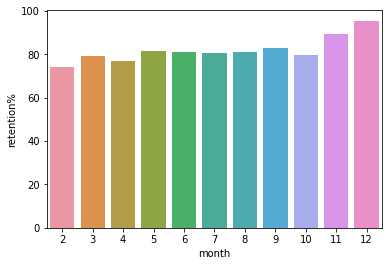

In [258]:
sns.barplot(x="month",y="retention%",data=retention_df)

Retention % is  more for the month 12, and there is no much variance in the retention percentage.